In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, IterativeImputer

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname('Utils'), '..')))
# from Utils.constants import DATASETS_FOLDER_PATH
from Utils.constants import CLASSIFIERS_COLUMN
from sklearn.ensemble import RandomForestClassifier
from Utils.data_utils import *


In [2]:
# Courses Packages
from Utils.DataVisualization import PlotConfusionMatrix, PlotLabelsHistogram, PlotBinaryClassData

In [3]:
# import the data
df = load_data_from_folder()
df = df.drop(columns=['file_name'])
print('shape =',df.shape)

df.describe()

shape = (6552, 10)


ph     Hardness        Solids  Chloramines      Sulfate  \
count  5570.000000  6552.000000   6552.000000  6552.000000  4990.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594176    32.877252   8767.901548     1.582964    41.412689   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.697010   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950968   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   6552.000000     6552.000000      6228.000000  6552.000000  6552.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.817895        3.307909        16.173710     0.780323     0.487812  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.835966     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.339918     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6552 entries, 0 to 6551
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               5570 non-null   float64
 1   Hardness         6552 non-null   float64
 2   Solids           6552 non-null   float64
 3   Chloramines      6552 non-null   float64
 4   Sulfate          4990 non-null   float64
 5   Conductivity     6552 non-null   float64
 6   Organic_carbon   6552 non-null   float64
 7   Trihalomethanes  6228 non-null   float64
 8   Turbidity        6552 non-null   float64
 9   Potability       6552 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 512.0 KB


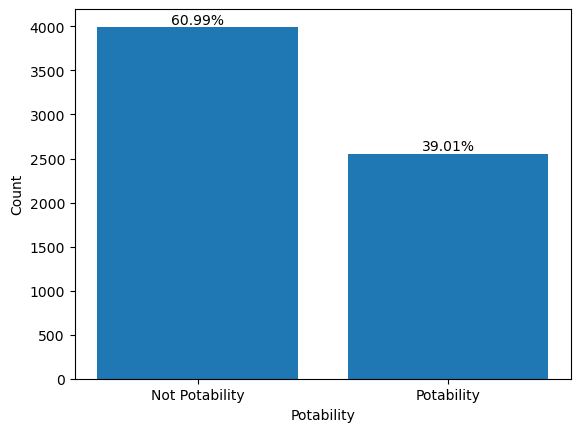

In [5]:
plt = get_balance_plot(df,CLASSIFIERS_COLUMN)
plt.show()

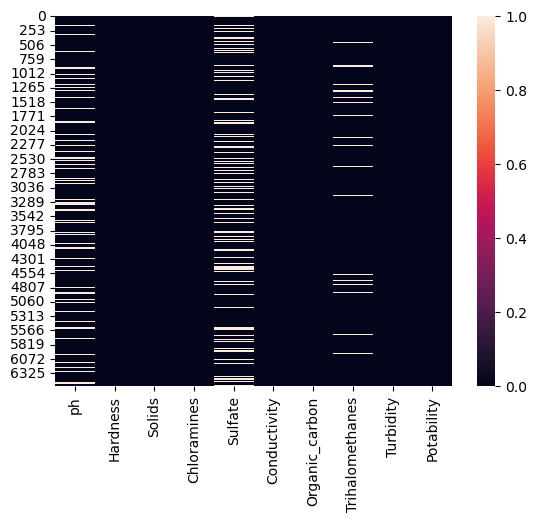

In [6]:
# clean data - before cleaning
sns.heatmap(df.isnull());

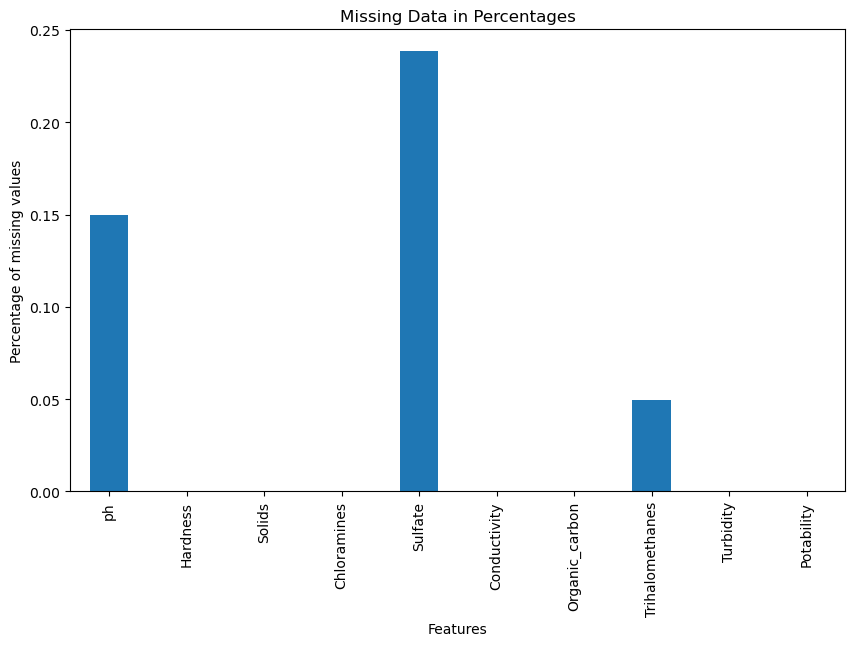

In [7]:
df.isnull().mean().plot.bar(figsize=(10,6)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

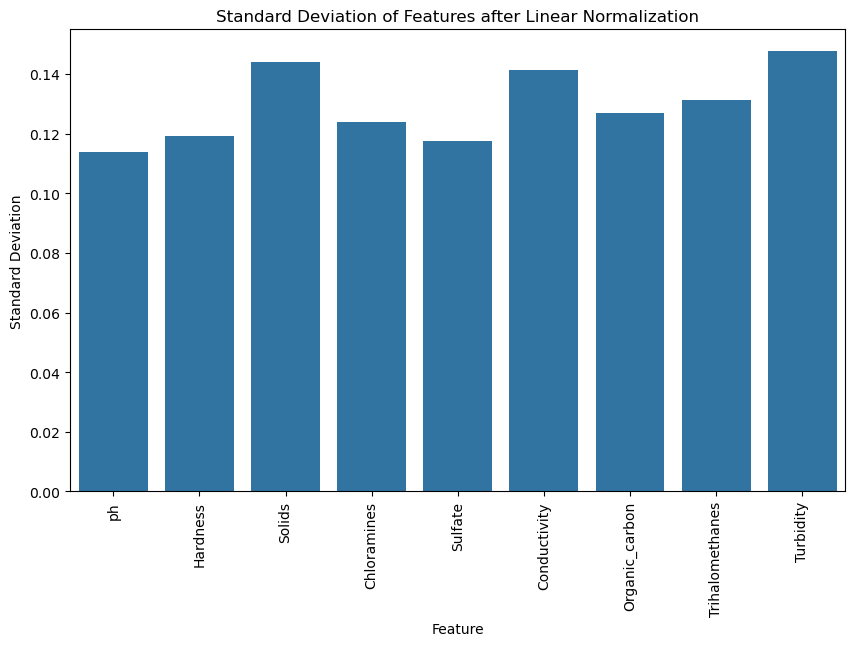

In [8]:
# Assuming df is your DataFrame containing the data
df_features = df.iloc[:, :-1]
normalized_df = (df_features - df_features.min()) / (df_features.max() - df_features.min())  # Linearly normalize each feature to have a max of 1
std = normalized_df.std()  # Calculate the standard deviation of each feature

# Plot the standard deviation of each feature after linear normalization
plt.figure(figsize=(10, 6))
sns.barplot(x=std.index, y=std.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Feature')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Features after Linear Normalization')
plt.show()

(6552, 10)


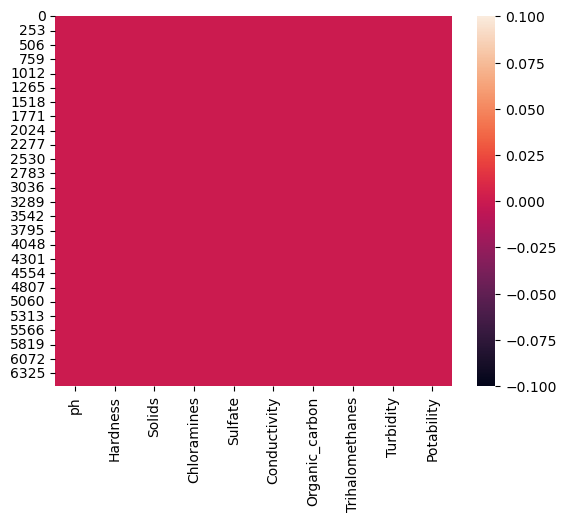

In [9]:
# clean data - after cleaning
df_clean = normalized_df.copy()
df_clean = pd.concat([df_clean, df['Potability']], axis=1) # add back potability column

# remove null rows
# df_clean.dropna(inplace=True)

# mean null rows
# df_clean.fillna(normalized_df.mean(), inplace=True)

# KNN Imputer
imputer = KNNImputer(n_neighbors=5) # Create a KNN imputer
df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)

# Iterative Imputer
# imputer = IterativeImputer(random_state=0, skip_complete=True)  # Create an IterativeImputer
# df_clean = pd.DataFrame(imputer.fit_transform(df_clean), columns=df_clean.columns)


print(df_clean.shape)

sns.heatmap(df_clean.isnull());

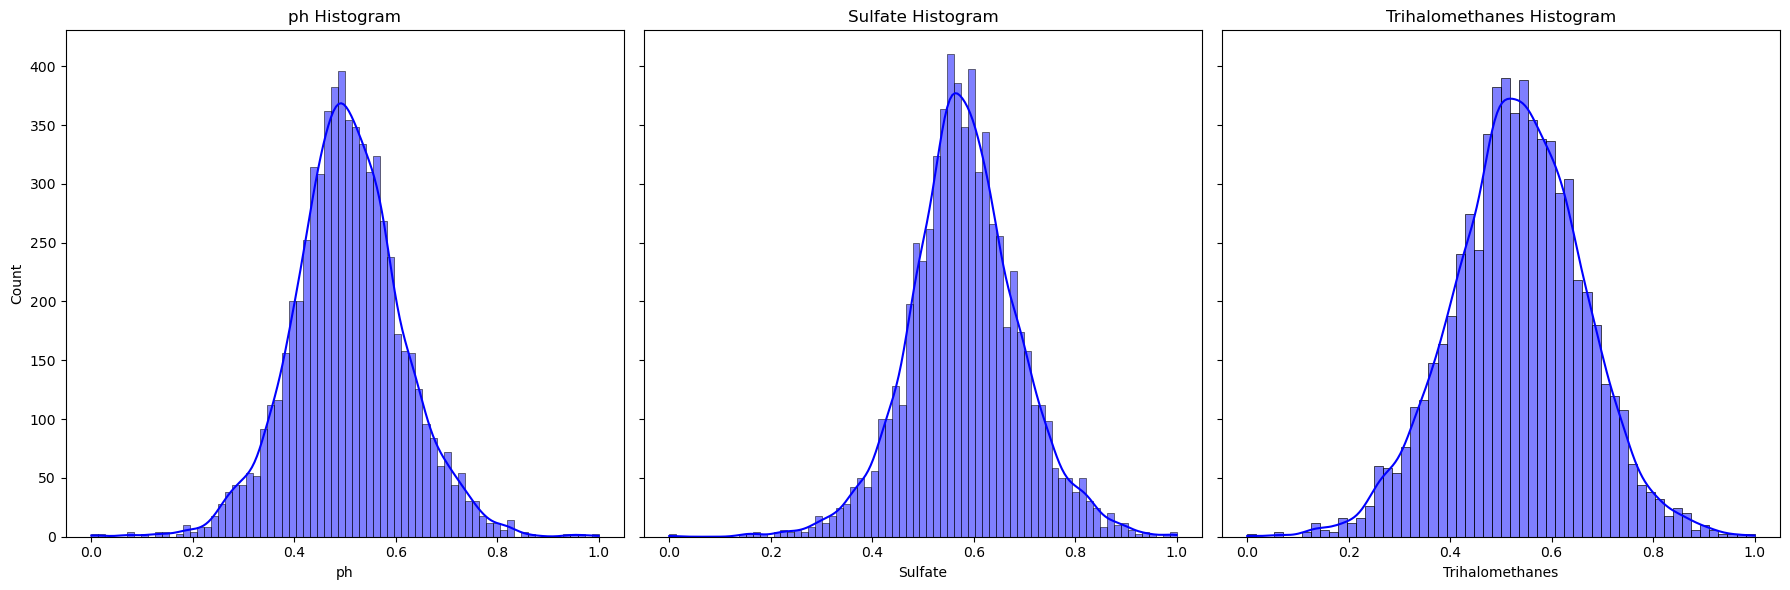

In [10]:
# Create subplots using Seaborn
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Features to plot
features = [df_clean['ph'], df_clean['Sulfate'], df_clean['Trihalomethanes']]

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(data=feature, ax=axes[i], kde=True, color='blue', stat='count')
    axes[i].set_title(f'{feature.name} Histogram')

plt.tight_layout()
plt.show()

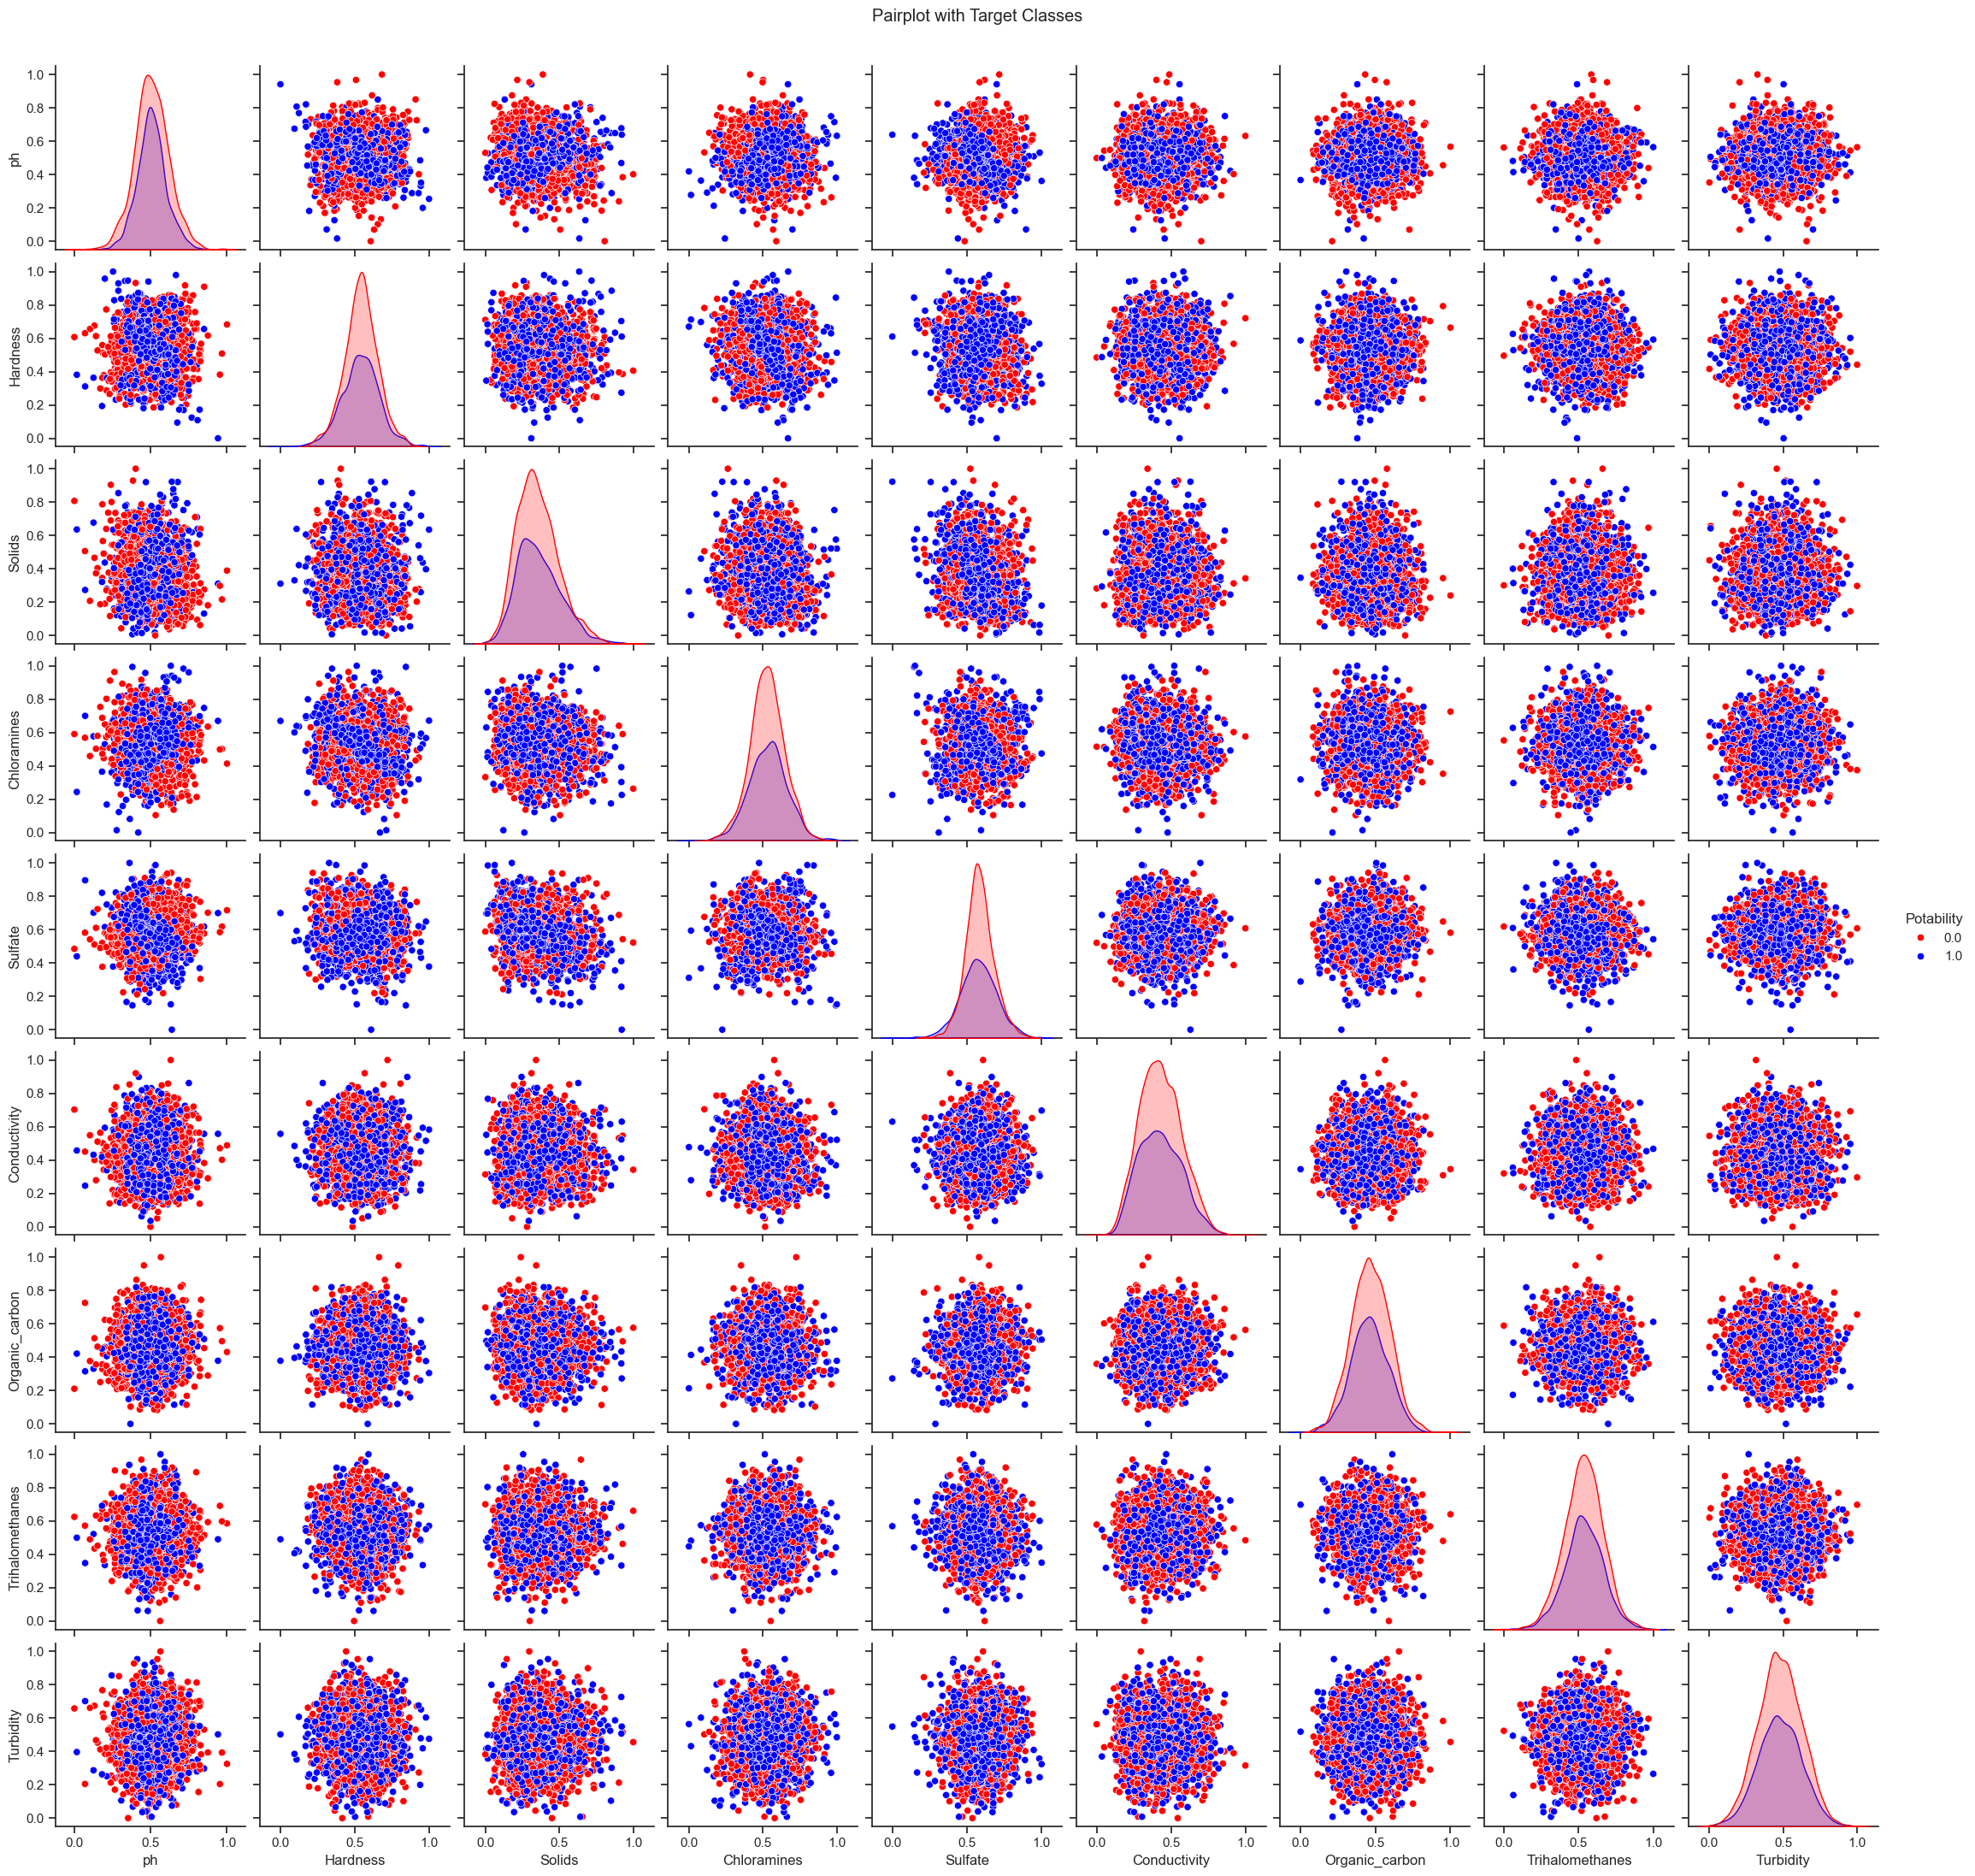

In [11]:
pairplot = get_pairplot(df_clean,CLASSIFIERS_COLUMN)
pairplot

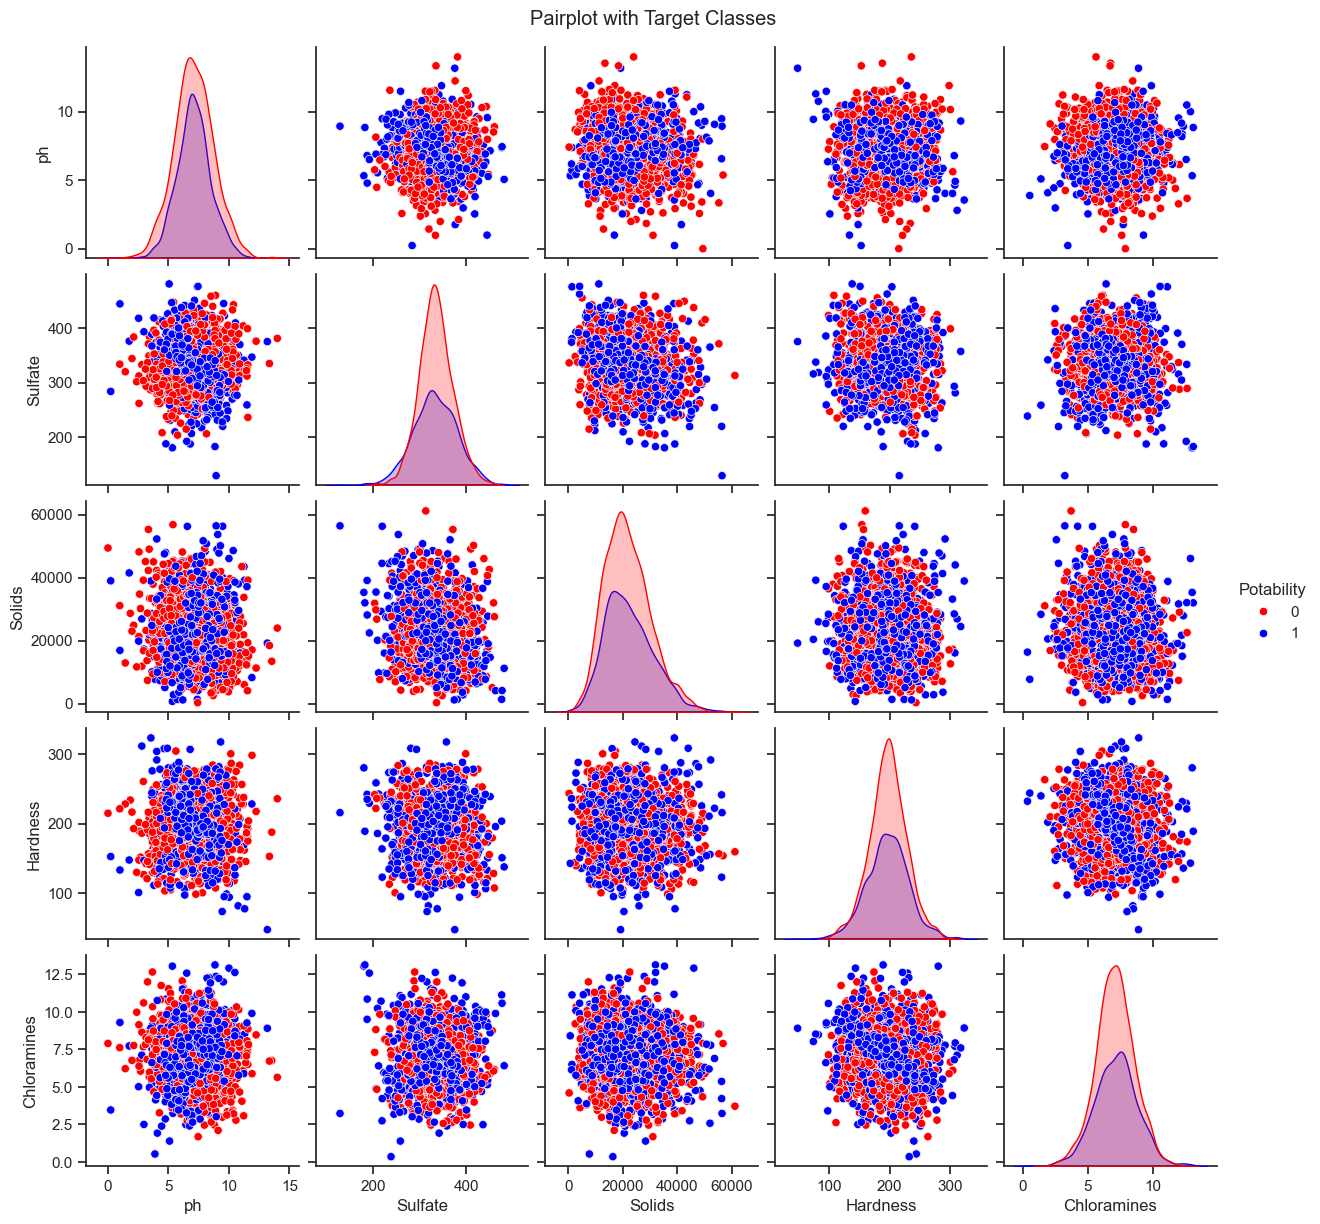

In [12]:
get_pairplot(df.loc[:,['ph','Sulfate','Solids','Hardness','Chloramines',CLASSIFIERS_COLUMN]],CLASSIFIERS_COLUMN)

In [13]:
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
6547  4.668102  193.681735  47580.991603     7.166639  359.948574   
6548  7.808856  193.553212  17329.802160     8.061362         NaN   
6549  9.419510  175.762646  33155.578218     7.350233         NaN   
6550  5.126763  230.603758  11983.869376     6.303357         NaN   
6551  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
6547    526.424171       13.894419        66.687695   4.435821           1  
6548    392.449580       19.903225              NaN   2.798243           1  
6549    432.044783       11.039070        69.845400   3.298875           1  
6550    402.883113       11.168946        77.488213   4.708658           1  
6551    327.459760       16.140368        78.698446   2.309149           1  

[6552 rows x 10 columns]

<Axes: >

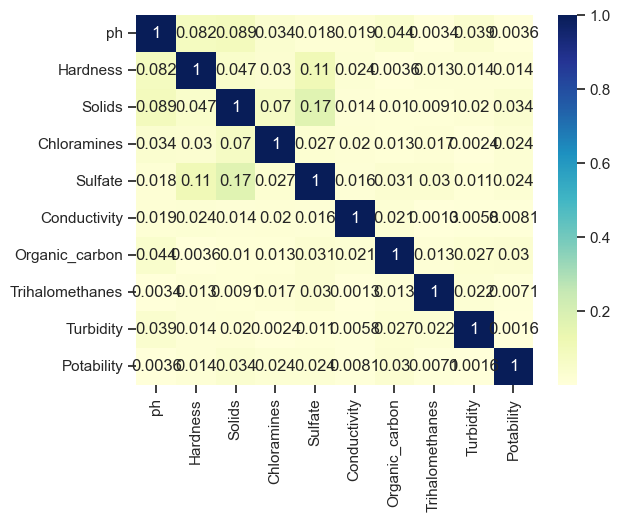

In [14]:
get_corraletion_metrix(df)

<Axes: >

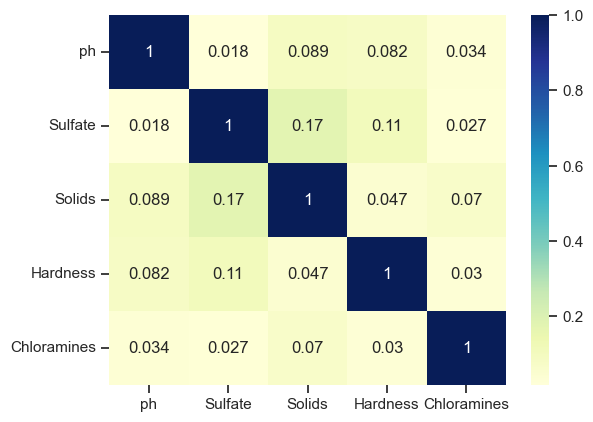

In [15]:
get_corraletion_metrix(df.loc[:,['ph','Sulfate','Solids','Hardness','Chloramines']])

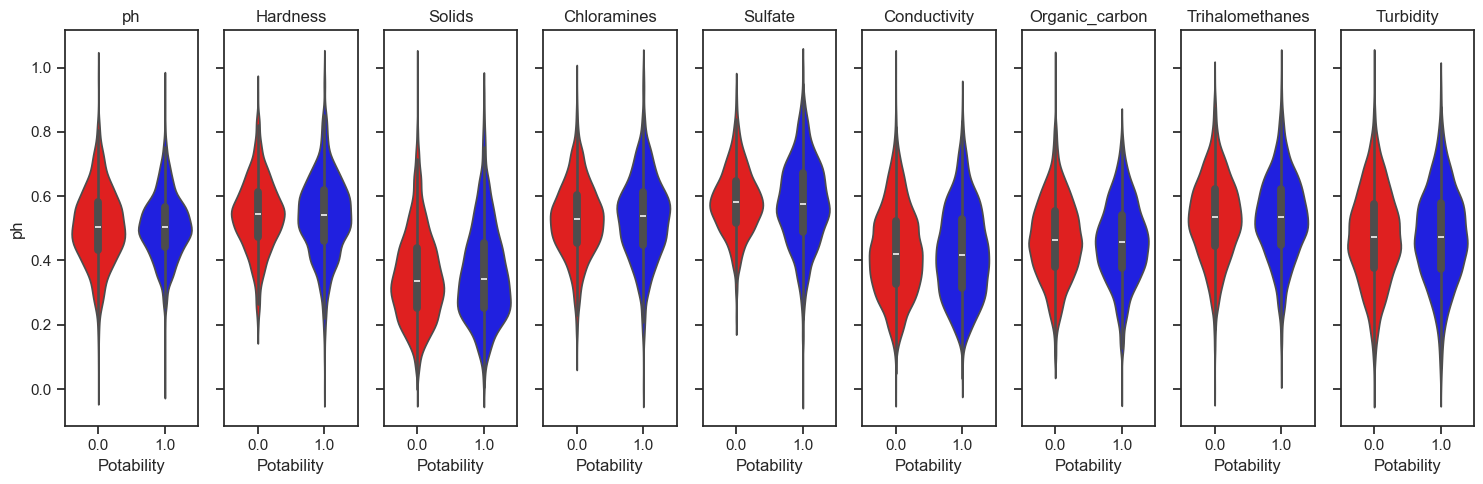

AttributeError: 'NoneType' object has no attribute 'show'

In [16]:
plt = get_violinplot(df)
plt.show()